In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
##dataset = pandas.read_csv('wa_weather_1944_till_2016.csv', sep=',')
dataset = pd.read_csv('2000-2016data.csv', sep=';')
dataset.describe()

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,uv_MJ_m*m
count,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6109.000000
mean,2008.000000,6.522383,15.731240,1.832496,12.282448,25.273784,18.778116,12.991337,18.986364
std,4.900031,3.449131,8.801478,5.374083,5.043679,6.273076,5.266178,4.318546,8.576431
min,2000.000000,1.000000,1.000000,0.000000,-1.300000,11.700000,7.200000,0.600000,0.200000
25%,2004.000000,4.000000,8.000000,0.000000,8.600000,20.200000,14.600000,9.800000,11.700000
50%,2008.000000,7.000000,16.000000,0.000000,12.100000,24.200000,18.050000,13.300000,17.900000
75%,2012.000000,10.000000,23.000000,0.400000,15.900000,29.800000,22.650000,16.000000,26.800000
max,2016.000000,12.000000,31.000000,99.000000,28.600000,44.500000,35.750000,26.200000,37.100000


In [3]:
dataset.shape

(20333, 9)

In [4]:
dataset.isnull().any()
dataset = dataset.dropna()
dataset.isnull().sum()

Year           0
Month          0
Day            0
rainfall_mm    0
min_temp_C     0
max_temp_C     0
daily_avg      0
daily_range    0
uv_MJ_m*m      0
dtype: int64

In [5]:
X = dataset[['max_temp_C', 'rainfall_mm', 'uv_MJ_m*m']]
y = dataset['daily_avg']

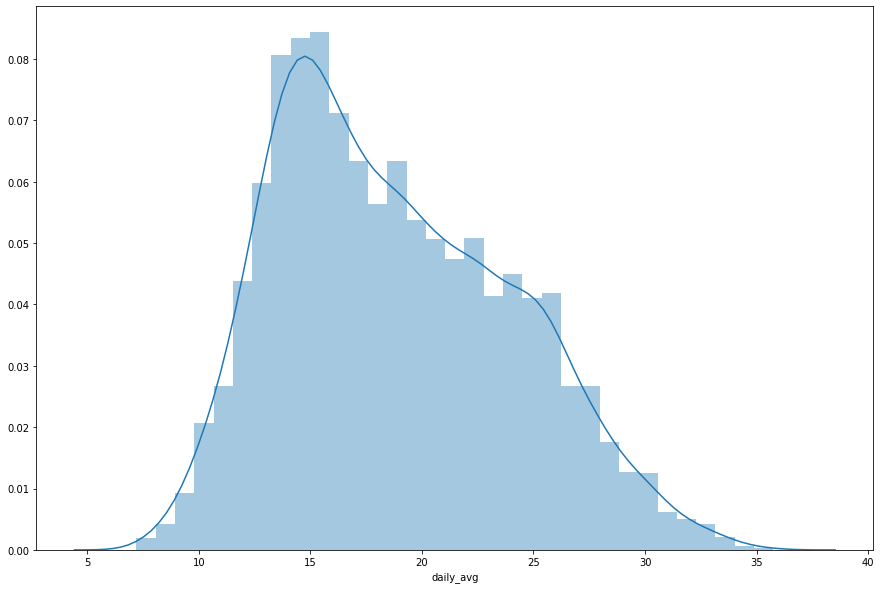

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['daily_avg'])

In [7]:
# Split 80% of data to train and 20% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(regressor.coef_)
print(X.columns)

[ 0.88442418  0.08910258 -0.06970626]
Index(['max_temp_C', 'rainfall_mm', 'uv_MJ_m*m'], dtype='object')


In [10]:
# Most optimal coefficients for attributes
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
# How each unit of attribute affects n units in wine quality
coeff_df

,Coefficient
max_temp_C,0.884424
rainfall_mm,0.089103
uv_MJ_m*m,-0.069706


In [11]:
y_pred = regressor.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head()
df1

,Actual,Predicted
2534,17.45,16.880462
250,14.60,13.922389
6031,12.80,12.367238
3875,15.85,15.298892
3528,8.80,11.438147


In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2792887237728925
Mean Squared Error: 2.5258491587913063
Root Mean Squared Error: 1.5892920306826264
